In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sb # pretty plots

import scipy as scp # optimization, probability density functions and special functions

In [2]:
plt.rcParams['figure.figsize'] = (16.0, 8.0) # big figures on my computer

In [3]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Evaluation of classifiers

Let's define a simple threshold-based classifier and compute:
- Its ROC curve
- Its Precision-Recall curve

In [40]:
def gen_data(n_a = 500, n_b = 500, difficulty = 1):
    x = np.zeros(shape = [n_a + n_b])
    y = np.zeros(shape = [n_a + n_b])
    
    x[0:n_a] = np.random.randn(n_a) * difficulty
    y[0:n_a] = 0
    
    x[n_a:(n_a+n_b)] = 4 + (np.random.gamma(shape = 4, scale = 1, size = [n_b]) - 4 ) * difficulty
    y[n_a:(n_a+n_b)] = 1
    
    return x,y

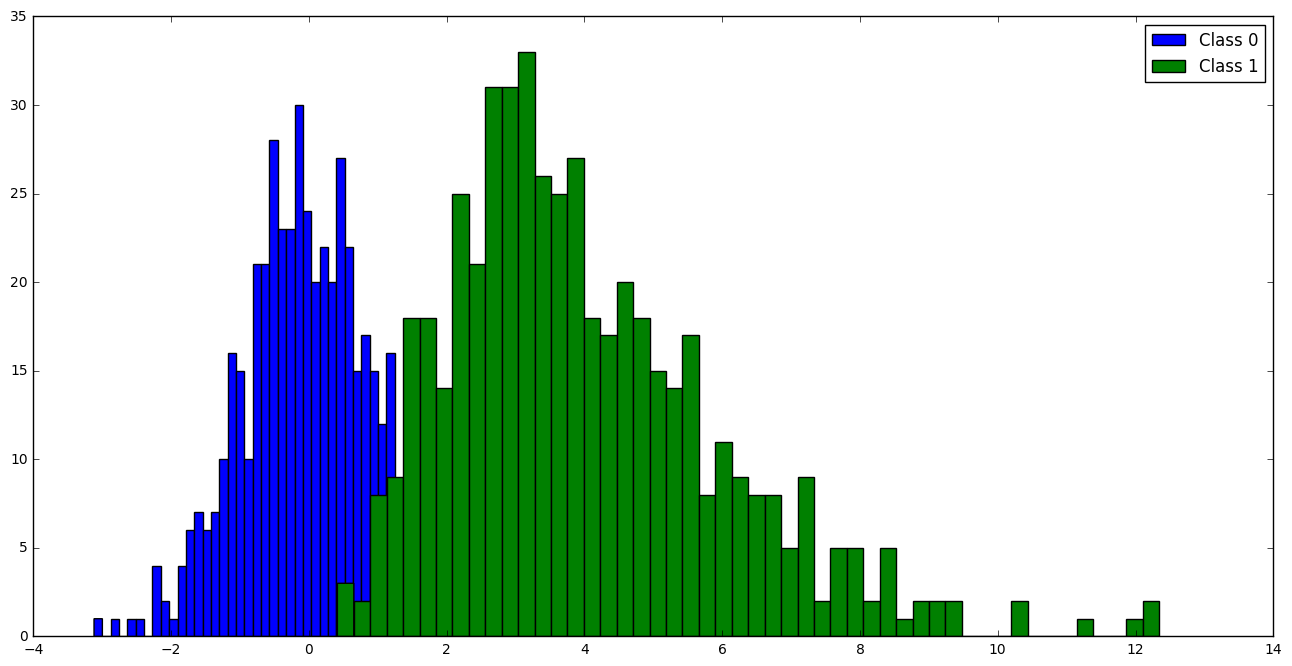

In [42]:
diff = 1

x,y = gen_data(difficulty = diff)

plt.hist( x[y==0], bins = 50, label = "Class 0")
plt.hist( x[y==1], bins = 50, label = "Class 1")
plt.legend()
plt.show()

In [31]:
def classifier(x, th = 1):
    return 1. * ( x >= th )

In [45]:
def classification_stats(y, y_hat):
    sensitivity = np.sum( (y == y_hat) * (y == 1) ) / np.sum( y == 1 )
    specificity = np.sum( (y == y_hat) * (y == 0) ) / np.sum( y == 0 )
    miss_rate   = np.mean( (y == y_hat))
    
    precision   = np.sum( (y == y_hat) * (y_hat == 1) ) / np.sum( y_hat == 1 )
    
    return sensitivity, specificity, miss_rate, precision
    
diff = 1

x,y = gen_data(difficulty = diff)
y_hat = classifier(x, 1)

classification_stats(y, y_hat)

(0.98399999999999999,
 0.84199999999999997,
 0.91300000000000003,
 0.86164623467600698)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program 

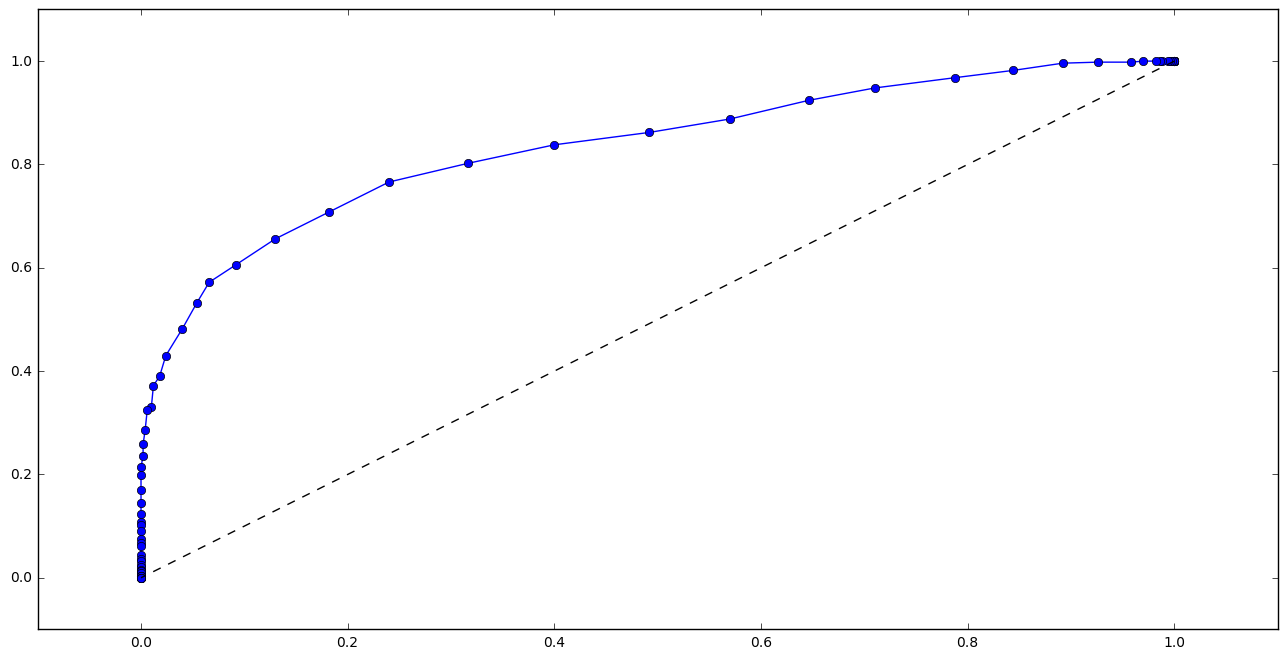

In [87]:
def ROC(x,y, th_array = np.linspace(-20,20,101) ):
    roc_x = np.zeros_like(th_array)
    roc_y = np.zeros_like(th_array)
    
    for i in range(len(th_array)):
        th = th_array[i]
        
        y_hat = classifier(x,th)
        
        sensitivity, specificity, miss_rate, precision = classification_stats(y, y_hat)
        
        roc_x[i] = 1 - specificity
        roc_y[i] = sensitivity
        
    plt.plot(roc_x, roc_y, '-o')
    plt.plot(roc_x, roc_x, 'k--')

for diff in [2]: #[0.05, 1,2,3,4,5]:
    for prop_0 in [0.5]: #[0.5, 0.95]:
        n_a = np.round(10**3 * prop_0)
        n_b = np.round(10**3 * (1-prop_0))
        x,y = gen_data(n_a, n_b, difficulty = diff)
        ROC(x,y)

    
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program 

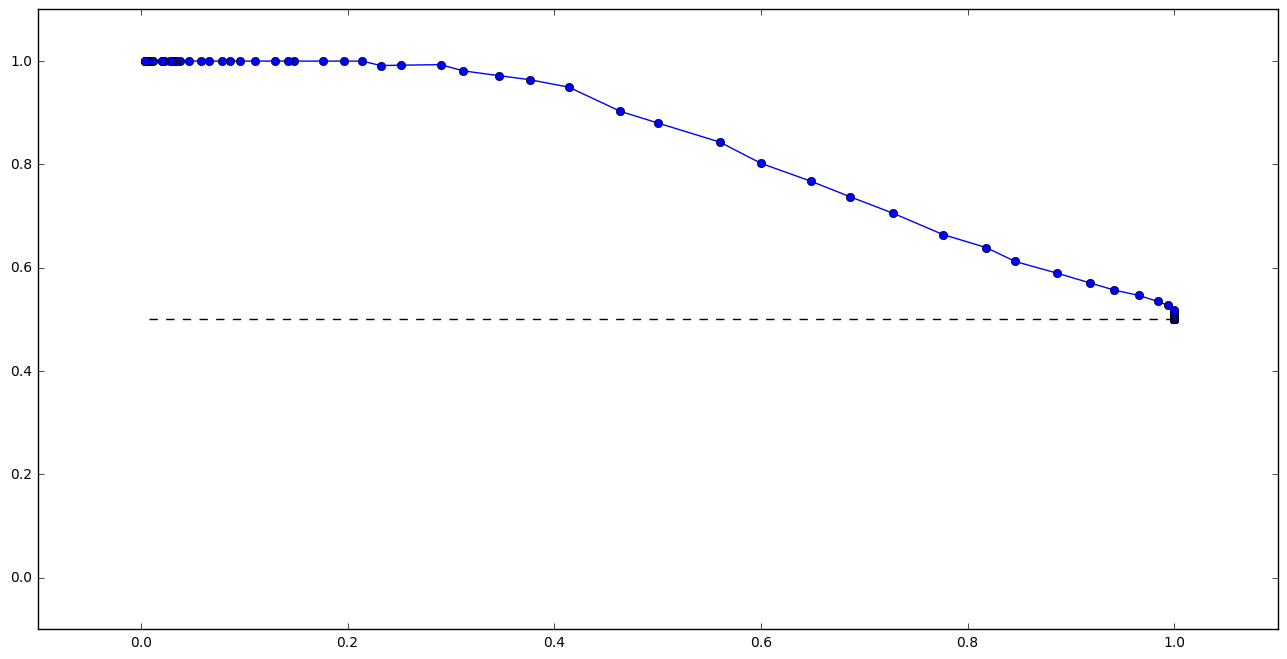

In [89]:
def prec_recall(x,y, th_array = np.linspace(-20,20,101) ):
    curve_x = np.zeros_like(th_array)
    curve_y = np.zeros_like(th_array)
    
    for i in range(len(th_array)):
        th = th_array[i]
        
        y_hat = classifier(x,th)
        
        sensitivity, specificity, miss_rate, precision = classification_stats(y, y_hat)
        
        curve_x[i] = sensitivity
        curve_y[i] = precision 
        
    plt.plot(curve_x, curve_y, '-o')
    plt.plot(curve_x, np.ones_like(curve_x) * np.mean(y), 'k--')
    
for diff in [2]: #[0.05, 1,2,3,4,5]:
    for prop_0 in [0.5]: #[0.5, 0.95]:
        n_a = np.round(10**3 * prop_0)
        n_b = np.round(10**3 * (1-prop_0))
        x,y = gen_data(n_a, n_b, difficulty = diff)
        prec_recall(x,y)

    
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.show()

In [75]:
import pdb
pdb.pm()

> <ipython-input-40-89c31e6ee431>(8)gen_data()
-> x[n_a:(n_a+n_b)] = 4 + (np.random.gamma(shape = 4, scale = 1, size = [n_b]) - 4 ) * difficulty
(Pdb) n_a
800.0
(Pdb) n_b
199.99999999999994
(Pdb) q
